<a href="https://colab.research.google.com/github/Rohith715/Machine-Learning/blob/main/Titanic%20dataset%20on%20kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
dp=pd.read_csv("/content/train.csv")
dt=dp
dt.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in dt:
  dt[x]=le.fit_transform(dt[x])
dt1=pd.DataFrame(dt)
heada=dt.columns


In [5]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
ch1=dt1["Cabin"]
ch1=np.array(ch1).reshape(-1,1)
ch2=si.fit_transform(ch1)
ch2=ch2.ravel()
dt1["Cabin"]=ch2

In [6]:
from sklearn.impute import SimpleImputer
si2=SimpleImputer(strategy="mean")
zh=dt["Age"]
zh=np.array(zh).reshape(-1,1)
zh1=si2.fit_transform(zh)
zh1=zh1.ravel()
dt1["Age"]=zh1

In [7]:
dt1=pd.DataFrame(dt1,columns=heada)
dt1["Cabin"].shape

(891,)

In [8]:
target=dt1["Survived"]
inp=dt1.drop("Survived",axis=1)



In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dt1=sc.fit_transform(dt1)

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,target,test_size=0.1)

In [11]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(xtrain,ytrain)
xtest,ytest=sm.fit_resample(xtest,ytest)

In [12]:
#this is randomforest an ensemble model that uses desicion trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
model.score(xtest,ytest)

0.8679245283018868

In [13]:
#this is linear regression a simple yet good model that ensures linear relationship
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.predict(xtest)
lr.score(xtest,ytest)

0.5137060073491679

In [14]:
#this is logisticregression model
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
gg=lg.predict(xtest)
lg.score(xtest,ytest)
print(accuracy_score(gg,ytest))

0.8207547169811321


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.linear_model import Perceptron
mod=Perceptron()
mod.fit(xtrain,ytrain)
z=mod.predict(xtest)
accuracy_score(pred,ytest)

0.8679245283018868

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
model.score(xtest,ytest)

0.8490566037735849

In [17]:
print(precision_score(ytest,pred))

0.9111111111111111


In [18]:
print(xtest.shape,ytest.shape)

(106, 11) (106,)


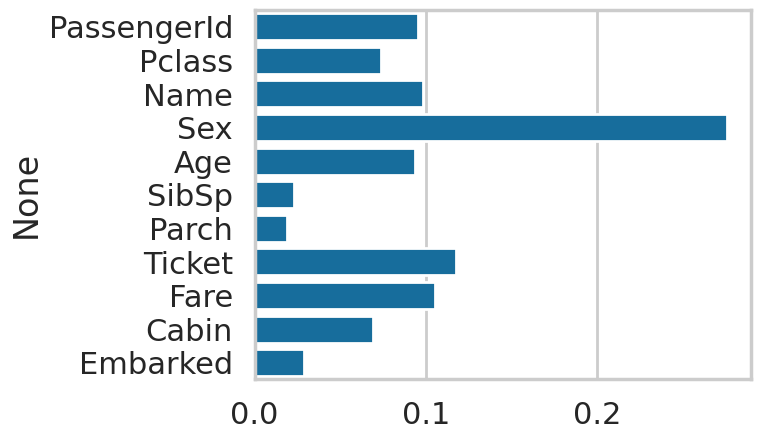

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set_palette("colorblind")
#print(model.feature_importances_)
sns.barplot(x=model.feature_importances_,y=inp.columns)
plt.show()